In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle
import csv
from sklearn import datasets

In [2]:
data=pd.read_csv('/content/kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
data.columns= ['identity no','age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   identity no              400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [6]:
data.isnull().any()

identity no                False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [7]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mode(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mode(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mode(),inplace=True)

In [8]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [9]:
data.isnull().sum()

identity no                  0
age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells              0
pus_cell                     0
pus_cell_clumps              0
bacteria                     0
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
hemoglobin                   0
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 0
diabetesmellitus             0
coronary_artery_disease      0
appetite                     0
pedal_edema                  0
anemia                       0
class                        0
dtype: int64

In [10]:
catcols = set(data.dtypes[data.dtypes=='object'].index.values)
print(catcols)

{'diabetesmellitus', 'packed_cell_volume', 'pus_cell_clumps', 'red_blood_cells', 'bacteria', 'anemia', 'class', 'white_blood_cell_count', 'red_blood_cell_count', 'appetite', 'coronary_artery_disease', 'hypertension', 'pedal_edema', 'pus_cell'}


In [11]:
for i in catcols:
    print("Columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')
    

Columns: diabetesmellitus
Counter({'no': 260, 'yes': 134, '\tno': 3, '\tyes': 2, ' yes': 1})
************************************************************************************************************************

Columns: packed_cell_volume
Counter({nan: 70, '52': 21, '41': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38': 5, '47': 4, '49': 4, '53': 4, '51': 4, '54': 4, '27': 3, '22': 3, '25': 3, '23': 2, '19': 2, '16': 1, '\t?': 1, '14': 1, '18': 1, '17': 1, '15': 1, '21': 1, '20': 1, '\t43': 1, '9': 1})
************************************************************************************************************************

Columns: pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
************************************************************************************************************************

Columns: red

In [12]:
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus','hypertension','pus_cell_clumps','red_blood_cells']

In [13]:
from sklearn.preprocessing import LabelEncoder

# loop over categorical columns
for i in catcols:
    # print the original column data
    print("LABEL ENCODING OF:",i)
    
    LEi= LabelEncoder()
    print(c(data[i]))
    data[i]=LEi.fit_transform(data[i])
    
    # print the transformed column data
    print(c(data[i]))
    
    # print a line of asterisks for visual separation
    print("*"*100)


LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF: coronary_arter

In [14]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(contcols)

{'blood_pressure', 'age', 'bacteria', 'pedal_edema', 'red_blood_cells', 'hemoglobin', 'potassium', 'anemia', 'class', 'serum_creatinine', 'albumin', 'hypertension', 'blood_glucose_random', 'diabetesmellitus', 'pus_cell_clumps', 'sodium', 'identity no', 'sugar', 'coronary_artery_disease', 'specific_gravity', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'appetite', 'blood_urea', 'pus_cell'}


In [15]:
for i in contcols:
      print("Continous Columns :",i)
      print(c(data[i]))
      print("*"*120+'\n')

Continous Columns : blood_pressure
Counter({80.0: 116, 70.0: 112, 60.0: 71, 90.0: 53, 100.0: 25, 76.46907216494846: 12, 50.0: 5, 110.0: 3, 140.0: 1, 180.0: 1, 120.0: 1})
************************************************************************************************************************

Continous Columns : age
Counter({60.0: 28, 65.0: 17, 48.0: 12, 50.0: 12, 55.0: 12, 47.0: 11, 62.0: 10, 45.0: 10, 54.0: 10, 59.0: 10, 56.0: 10, 61.0: 9, 70.0: 9, 46.0: 9, 34.0: 9, 68.0: 8, 73.0: 8, 64.0: 8, 71.0: 8, 57.0: 8, 63.0: 7, 72.0: 7, 67.0: 7, 30.0: 7, 42.0: 6, 69.0: 6, 35.0: 6, 44.0: 6, 43.0: 6, 33.0: 6, 51.0: 5, 52.0: 5, 53.0: 5, 75.0: 5, 76.0: 5, 58.0: 5, 41.0: 5, 66.0: 5, 24.0: 4, 40.0: 4, 39.0: 4, 80.0: 4, 23.0: 4, 74.0: 3, 38.0: 3, 17.0: 3, 8.0: 3, 32.0: 3, 37.0: 3, 25.0: 3, 29.0: 3, 21.0: 2, 15.0: 2, 5.0: 2, 12.0: 2, 49.0: 2, 19.0: 2, 36.0: 2, 20.0: 2, 28.0: 2, 7.0: 1, 82.0: 1, 11.0: 1, 26.0: 1, 81.0: 1, 14.0: 1, 27.0: 1, 83.0: 1, 4.0: 1, 3.0: 1, 6.0: 1, 90.0: 1, 78.0: 1, 2.0: 1, 22.0:

In [16]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'blood_pressure', 'age', 'bacteria', 'pedal_edema', 'red_blood_cells', 'hemoglobin', 'potassium', 'anemia', 'class', 'serum_creatinine', 'hypertension', 'blood_glucose_random', 'diabetesmellitus', 'pus_cell_clumps', 'sodium', 'identity no', 'coronary_artery_disease', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'appetite', 'blood_urea', 'pus_cell'}


In [17]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)


{'blood_pressure', 'age', 'bacteria', 'pedal_edema', 'red_blood_cells', 'hemoglobin', 'potassium', 'anemia', 'class', 'serum_creatinine', 'hypertension', 'blood_glucose_random', 'diabetesmellitus', 'pus_cell_clumps', 'sodium', 'identity no', 'coronary_artery_disease', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'appetite', 'blood_urea', 'pus_cell'}


In [18]:
catcols.append('specific_gravity')
catcols.append('albumin')
catcols.append('sugar')
print(catcols)

['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellitus', 'hypertension', 'pus_cell_clumps', 'red_blood_cells', 'specific_gravity', 'albumin', 'sugar']


In [19]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({1: 364, 2: 34, 0: 2})

In [20]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno','no','\tyes','yes'})
c(data['diabetesmellitus'])

Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

In [21]:
data.describe()

,identity no,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell_clumps,bacteria,blood_glucose_random,...,sodium,potassium,hemoglobin,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.105000,0.055000,148.036517,...,137.528754,4.627244,12.526437,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.306937,0.228266,74.782634,...,9.204273,2.819783,2.716171,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,22.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,0.000000,0.000000,101.000000,...,135.000000,4.000000,10.875000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,0.000000,0.000000,126.000000,...,137.528754,4.627244,12.526437,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,0.000000,0.000000,150.000000,...,141.000000,4.800000,14.625000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,490.000000,...,163.000000,47.000000,17.800000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


<ipython-input-22-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

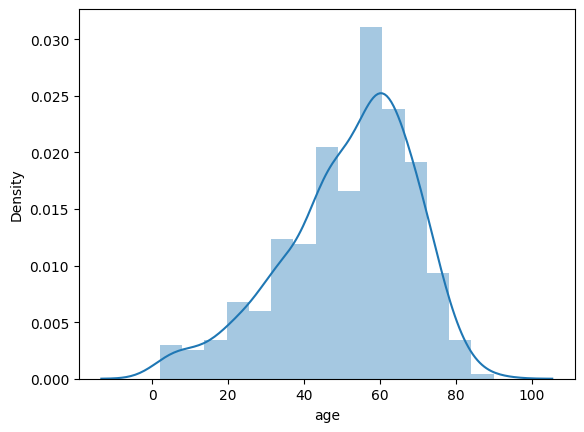

In [22]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age VS blood scatter plot')

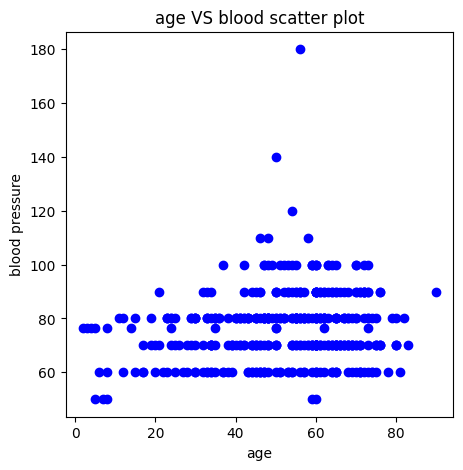

In [23]:

import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title("age VS blood scatter plot")

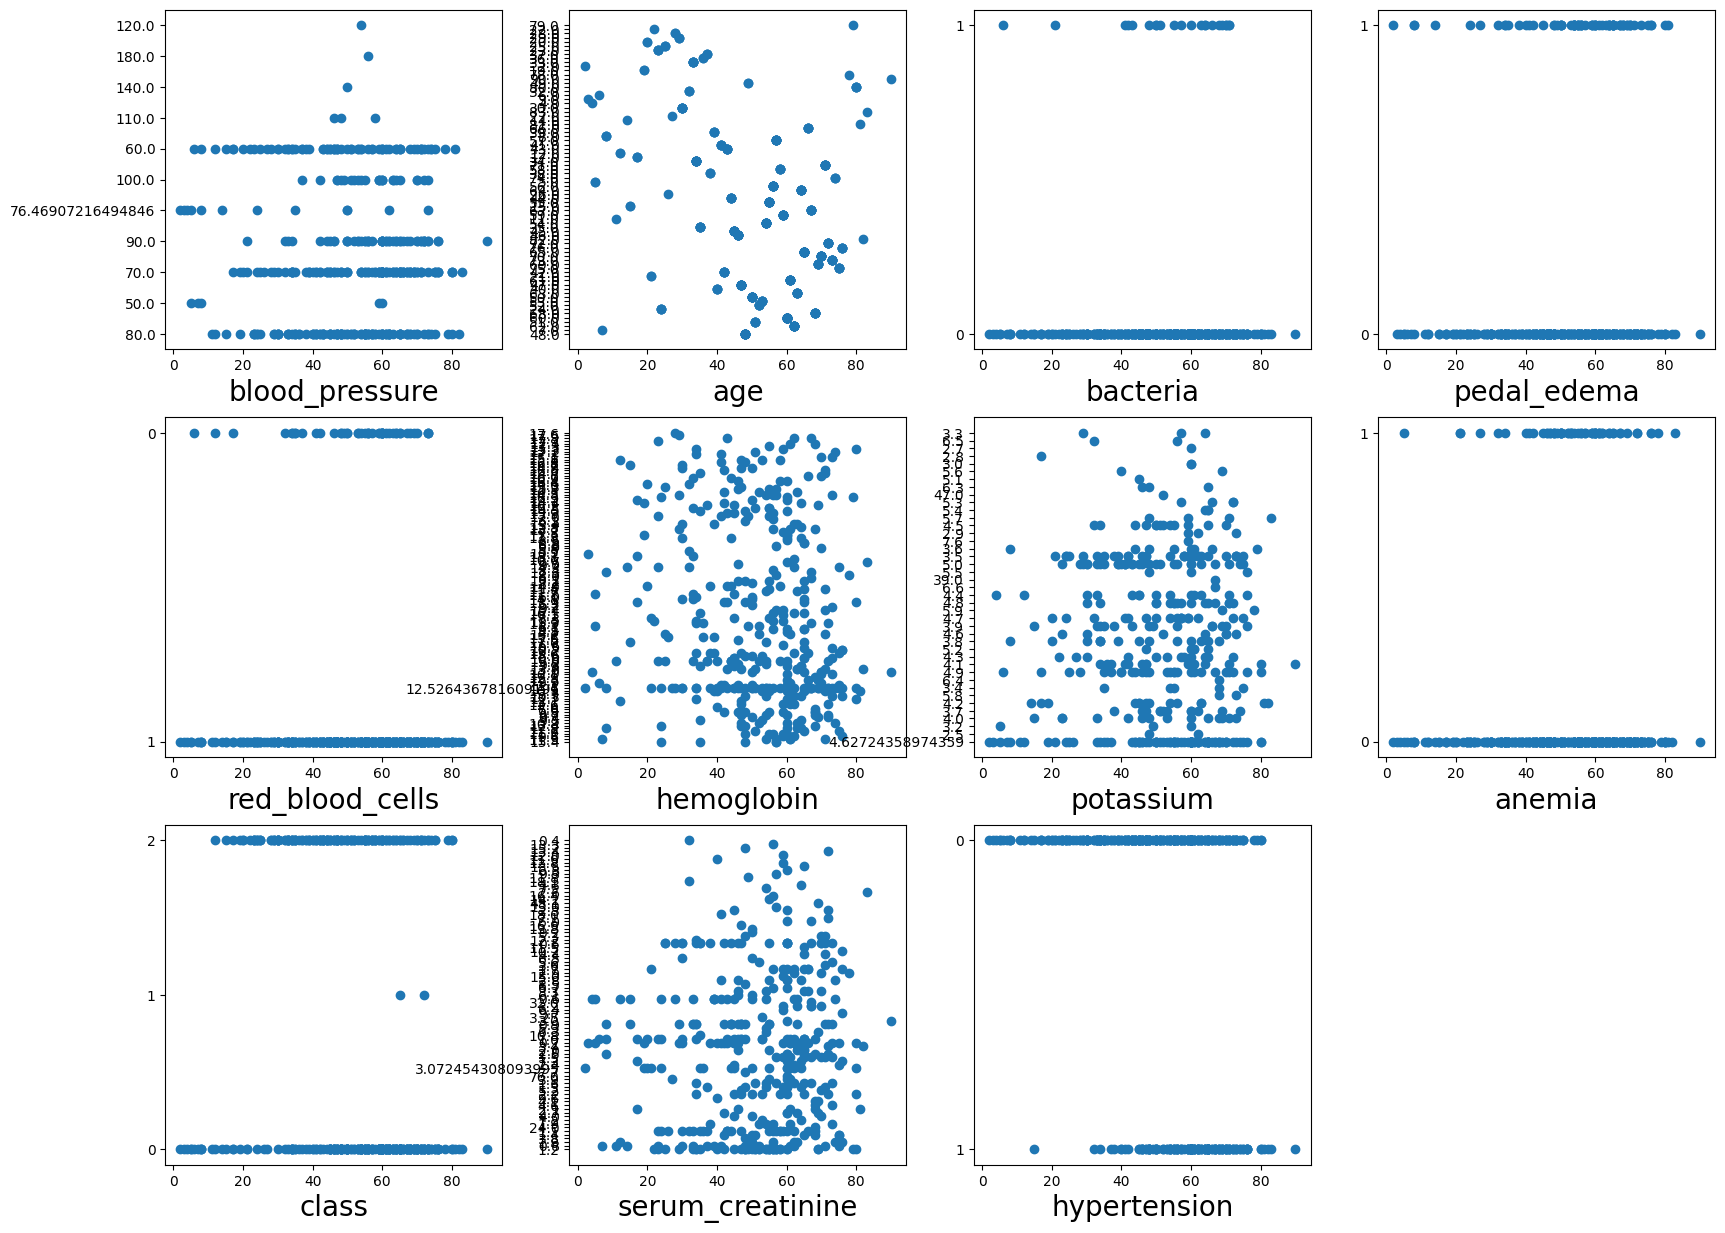

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber <= 11:
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(data['age'],data[column].astype(str))
        plt.xlabel(column, fontsize=20)
        plotnumber += 1
        
plt.show()


<ipython-input-25-e8d9004f5c7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")


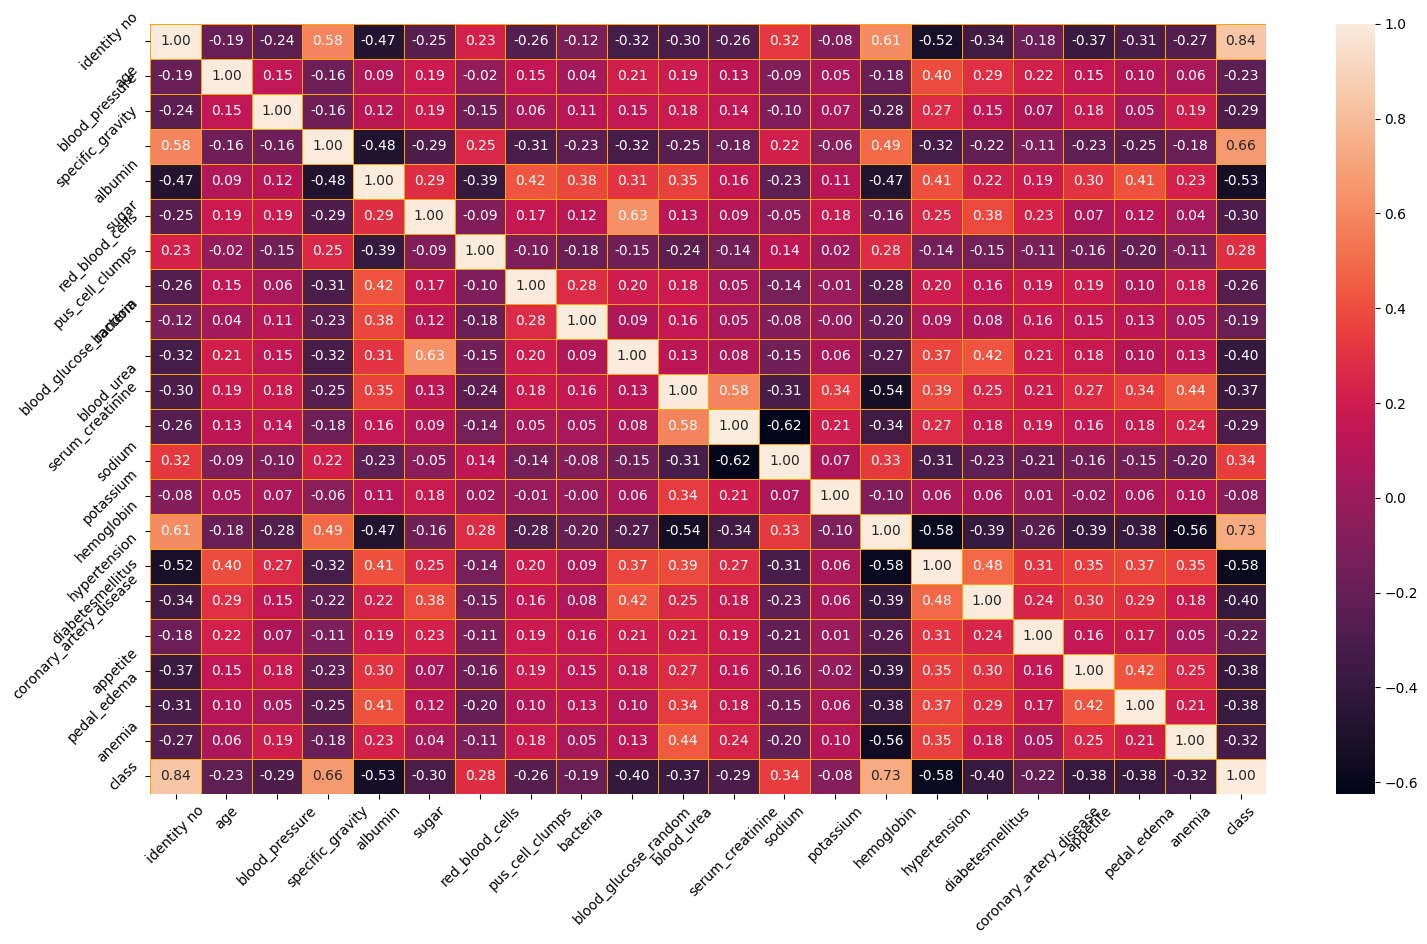

In [25]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: xlabel='class', ylabel='count'>

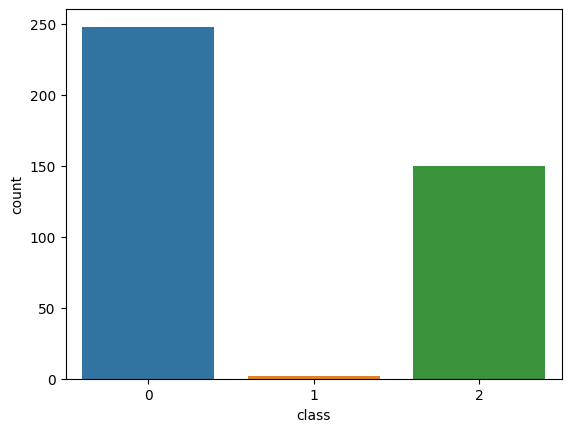

In [26]:
import seaborn as sns
sns.countplot(x='class',data=data)

In [27]:
from sklearn.preprocessing import StandardScaler
x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_bal = sc.fit_transform(x)

In [28]:
import pandas as pd
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea',
                     'pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
import tensorflow
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers  import Dense

In [31]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [32]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')
     

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [35]:
def predict_exist(sample_value):
  sample_value=np.array(sample_value)
  sample_value=sample_value.reshape(1,-1)
  sample_value=sc.transform(sample_value)
  return classification.predict(sample_value)


In [36]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
   print('Prediction high chance of CKd!')
else:
    print('Prediction Low chance of CKd!')

1/1 [==============================] - 0s 308ms/step
Prediction Low chance of CKd!


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


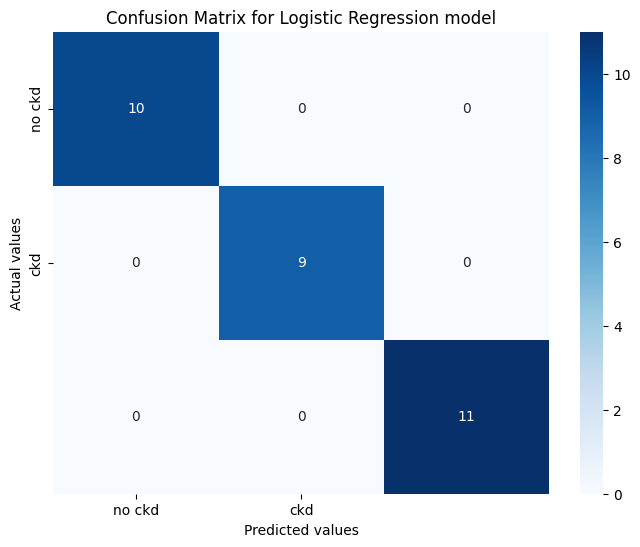

In [38]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


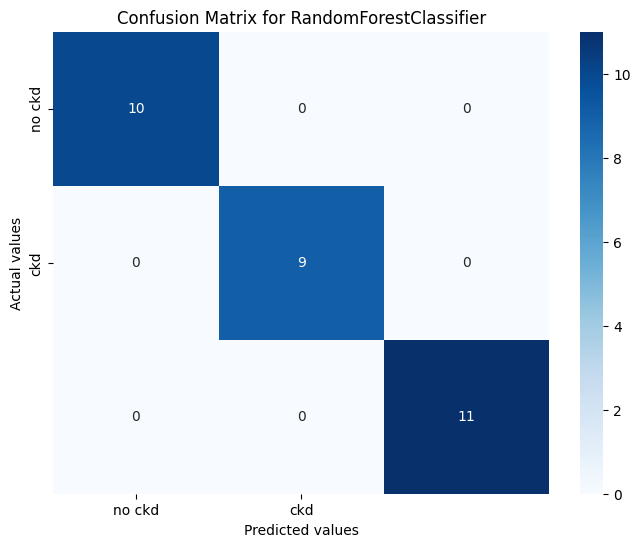

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

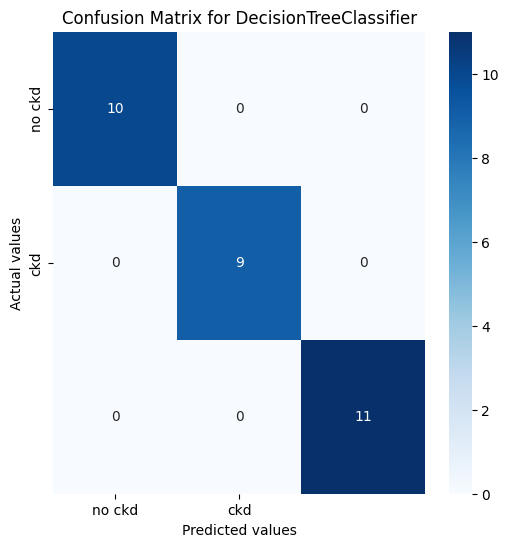

In [43]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

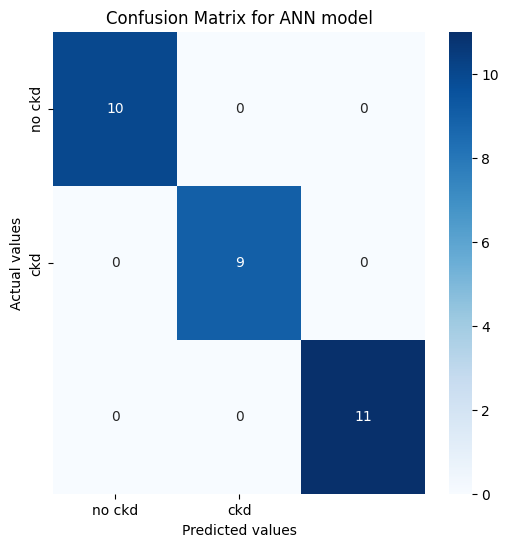

In [45]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)

g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Comparison of Model Classification Metric')
plt.savefig('./benchmark_models_performance.png', dpi=300)

In [ ]:
pickle.dump(lgr,open('CKD.pkl','wb'))

In [48]:
# importing the necessary dependencies
import numpy as np
import pandas as pd
from flask import Flask, request, render_template
import pickle

In [ ]:
app = Flask(__name__) # initializing a flask app
model = pickle.load(open(r'C:\Users\SILAS\Downloads\Flask\Flask\xyz.pkl', 'rb')) #loading the model

@app.route('/')# route to display the home page
def home():
    return render_template('home.html') #rendering the home page
@app.route('/Prediction',methods=['POST','GET'])
def prediction():
    return render_template('indexnew.html')
@app.route('/Home',methods=['POST','GET'])
def my_home():
    return render_template('home.html')

@app.route('/predict',methods=['POST'])# route to show the predictions in a web UI
def predict():
    
    #reading the inputs given by the user
    input_features = [float(x) for x in request.form.values()]
    features_value = [np.array(input_features)]
    
    features_name = ['red_blood_cells','pus_cell', 'blood glucose random', 'blood_urea','pedal_edema','anemia','diabetesmellitus',
       'coronary_artery_disease']
    
    df = pd.DataFrame(features_value, columns=features_name)
    
    # predictions using the loaded model file
    output = model.predict(df)
    
    # showing the prediction results in a UI# showing the prediction results in a UI
    return render_template('result.html', prediction_text=output)

if __name__ == '__main__':
    # running the app
    app.run(debug=True)
